In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import NuSVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your data 
data = pd.read_csv('cleaneded_main_model_data.csv')

# Select relevant features and target variable
selected_features = ['T (K)', 'P (MPa)', 'methane', 'ethane', 'propane', 'ibutane', 'ipentane', 'hexane', 'heptane', 'helium', 'oxygen', 'H2S', 'CO2']
target_variable = 'z'
X = data[selected_features]
y = data[target_variable]


In [2]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [4]:
# Define the Nu-SVR model
model = NuSVR(C=1.0, nu=0.5)

# Fit the model to the training data
model.fit(X_train, y_train)


NuSVR()

In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MAE, MAPE, RMSE, and R2
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.9f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.9f}%')
print(f'Root Mean Squared Error (RMSE): {rmse:.9f}')
print(f'R-squared (R2) Value: {r2:.9f}')


Mean Absolute Error (MAE): 0.000134593
Mean Absolute Percentage Error (MAPE): 0.013505108%
Root Mean Squared Error (RMSE): 0.000184464
R-squared (R2) Value: 0.969807601


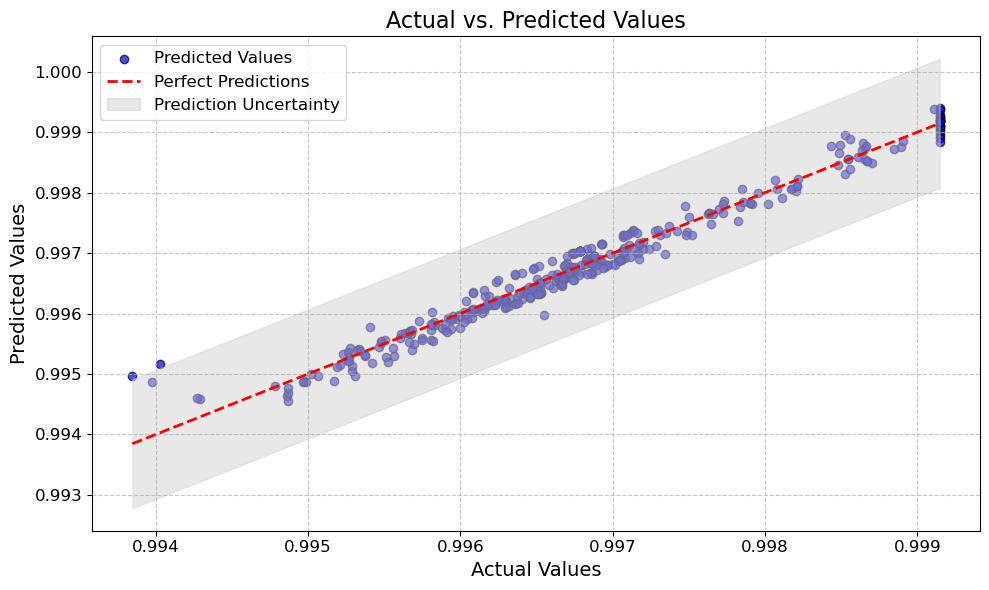

In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate standard deviations for predictions manually
y_std = np.std(y_pred)

# Create a scatter plot with improved styling
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, c='blue', edgecolors='k', marker='o', label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2,
         label='Perfect Predictions')
plt.fill_between([min(y_test), max(y_test)], [min(y_test) - y_std, max(y_test) - y_std],
                 [min(y_test) + y_std, max(y_test) + y_std], color='lightgrey', alpha=0.5, label='Prediction Uncertainty')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()


C:\Users\okola\AppData\Local\Temp\ipykernel_27660\2266826117.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  custom_colors = plt.cm.get_cmap("coolwarm", len(selected_features))
C:\Users\okola\AppData\Local\Temp\ipykernel_27660\2266826117.py:44: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, aspect=20, pad=0.02)


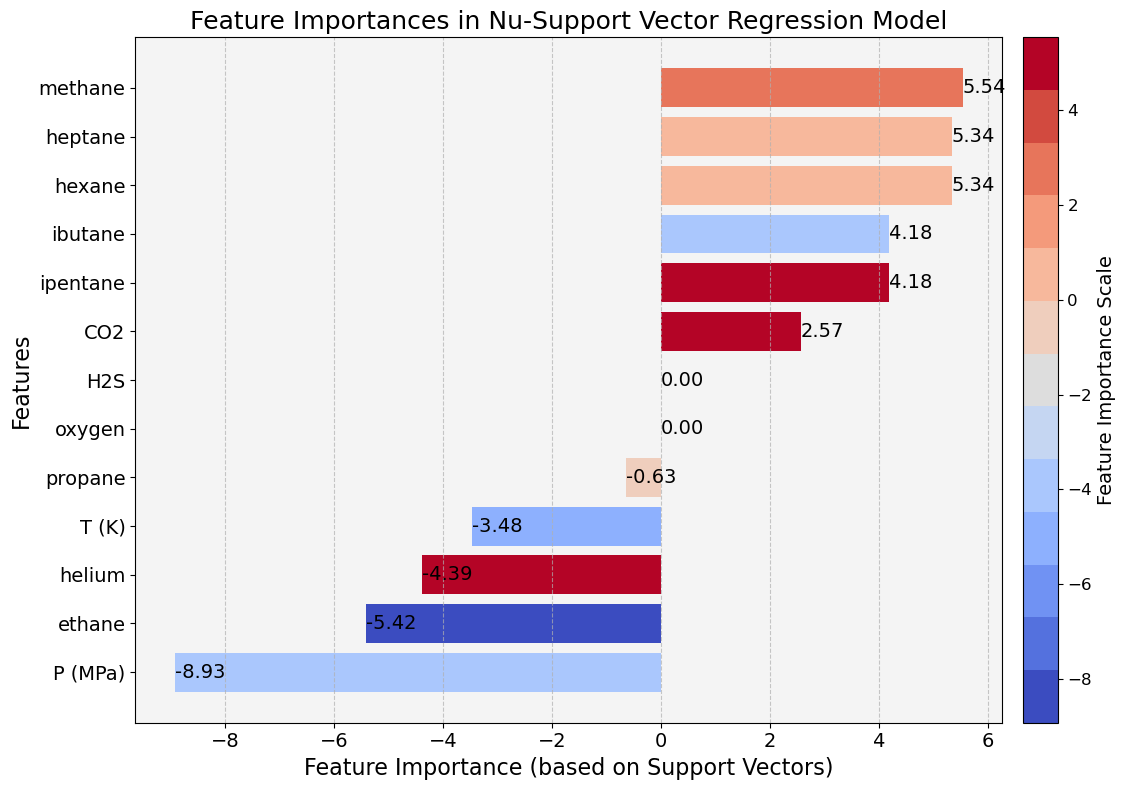

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Get the coefficients (dual coefficients) of the support vectors
support_vector_dual_coefs = model.dual_coef_.ravel()

# Identify the indices of support vectors
support_vector_indices = np.where(np.abs(support_vector_dual_coefs) > 1e-5)[0]

# Extract feature importances based on support vectors
feature_importances = np.zeros(len(selected_features))
for idx in support_vector_indices:
    feature_importances += support_vector_dual_coefs[idx] * X_train[idx]

# Create a visually appealing feature importance plot with creative colors
plt.figure(figsize=(12, 8))

# Use a custom colormap for the color scale with creative colors
custom_colors = plt.cm.get_cmap("coolwarm", len(selected_features))

colors = custom_colors((feature_importances - min(feature_importances)) / (max(feature_importances) - min(feature_importances)))

# Sort features by importance for a more organized presentation
sorted_indices = np.argsort(feature_importances)
sorted_features = [selected_features[i] for i in sorted_indices]
sorted_importances = [feature_importances[i] for i in sorted_indices]

plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Feature Importance (based on Support Vectors)', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.title('Feature Importances in Nu-Support Vector Regression Model', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate the bars with their values
for feature, importance in zip(sorted_features, sorted_importances):
    plt.text(importance, feature, f'{importance:.2f}', va='center', fontsize=14, color='black')

# Add a color scale or colorbar with a light background
sm = plt.cm.ScalarMappable(cmap=custom_colors, norm=plt.Normalize(vmin=min(feature_importances), vmax=max(feature_importances)))
sm.set_array([])
cbar = plt.colorbar(sm, aspect=20, pad=0.02)
cbar.set_label('Feature Importance Scale', fontsize=14)
cbar.ax.tick_params(labelsize=12)

# Set a light background to make the plot more visually attractive
plt.gca().set_facecolor('#F4F4F4')

plt.show()


In [8]:
# Create a DataFrame for predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Save the DataFrame to a CSV file
predictions_df.to_csv('Nu-Support_Vector_Regression_pred_values.csv', index=False)
